# <u>Lending Club Case Study - EDA</u>


<b>Aim:</b> The company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment. 

The data given contains information about past loan applicants and whether they ‘defaulted’ or not. The aim is to identify patterns which indicate if a person is likely to default, which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc.

# Importing Libraries

In [1]:
## import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

# Loading Loan Data

In [3]:
# loading the data
data = pd.read_csv("loan.csv")

In [4]:
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [5]:
data.shape

(39717, 111)

# Missing Values

### Checking Missing Values

In [6]:
data.isnull().sum()

id                                    0
member_id                             0
loan_amnt                             0
funded_amnt                           0
funded_amnt_inv                       0
term                                  0
int_rate                              0
installment                           0
grade                                 0
sub_grade                             0
emp_title                          2459
emp_length                         1075
home_ownership                        0
annual_inc                            0
verification_status                   0
issue_d                               0
loan_status                           0
pymnt_plan                            0
url                                   0
desc                              12940
purpose                               0
title                                11
zip_code                              0
addr_state                            0
dti                                   0


### Checking % Missing Values

In [7]:
# Checking of % missing data in each column
data_missing = (pd.DataFrame((data.isnull().sum()/data.shape[0])*100)).reset_index()


data_missing.columns = ['Column_name','percentage_missing']
data_missing

,Column_name,percentage_missing
0,id,0.000000
1,member_id,0.000000
2,loan_amnt,0.000000
3,funded_amnt,0.000000
4,funded_amnt_inv,0.000000
5,term,0.000000
6,int_rate,0.000000
7,installment,0.000000
8,grade,0.000000
9,sub_grade,0.000000


### Identifying fully empty columns i.e 100% missing values

In [8]:
# Identifying fully empty columns i.e 100% missing values
empty_cols_list = data_missing[data_missing.percentage_missing==100].Column_name.unique()
empty_cols_list

array(['mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal',
       'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m',
       'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
       'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim',
       'inq_fi', 'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths',
       'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq',
       'mths_since_recent_inq', 'mths_since_recent_revol_delinq',
       'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl',
       'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl',
       'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats',
       'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m',
       'num_tl_op_past_12m', 'pct_tl_nvr_dl

In [9]:
len(empty_cols_list)

54

### Removing fully empty columns i.e 100% missing values

Out of 111 columns, 54 columns are completely empty

In [10]:
# Removing fully empty columns i.e 100% missing values
data_v1 = data.drop(columns=empty_cols_list)
data_v1.shape

(39717, 57)

# Single Valued column

In [11]:
single_value_cols = data_v1.columns[data_v1.nunique() <= 1]
len(single_value_cols)

9

In [12]:
single_value_cols

Index(['pymnt_plan', 'initial_list_status', 'collections_12_mths_ex_med',
       'policy_code', 'application_type', 'acc_now_delinq',
       'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens'],
      dtype='object')

In [13]:
data_v1[single_value_cols].head(2)

,pymnt_plan,initial_list_status,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,tax_liens
0,n,f,0.0,1,INDIVIDUAL,0,0.0,0,0.0
1,n,f,0.0,1,INDIVIDUAL,0,0.0,0,0.0


## Removing single valued columns i.e containing only 1 value

- 9 columns contains only 1 value.
- These columns doesn't contribute to our analysis. Thus, removing them.

In [14]:
# Removing single valued columns i.e containing only 1 value
data_v2 = data_v1.drop(columns=single_value_cols)
data_v2.shape

(39717, 48)

In [15]:
data_v2[["id", "member_id", "url", "title", "emp_title", "zip_code", "last_credit_pull_d", "desc"]].head(2)

,id,member_id,url,title,emp_title,zip_code,last_credit_pull_d,desc
0,1077501,1296599,https://lendingclub.com/browse/loanDetail.acti...,Computer,NaN,860xx,May-16,Borrower added on 12/22/11 > I need to upgra...
1,1077430,1314167,https://lendingclub.com/browse/loanDetail.acti...,bike,Ryder,309xx,Sep-13,Borrower added on 12/22/11 > I plan to use t...


# Columns irrelevant to Loan analysis

<b>1. Columns with text values which consists of more unique values</b><br>
- id
- url
- member_id
- emp_title
- title 
- desc

<b>2. Columns which don't consists of valuable data (or masked)</b><br>
- zip_code

<b>3. Columns which are post loan start calculations </b><br>
- total_rec_int
- total_rec_prncp
- total_rec_late_fee
- total_pymnt
- total_pymnt_inv
- out_prncp
- out_prncp_inv
- last_credit_pull_d
- last_pymnt_amnt
- last_pymnt_d
- next_pymnt_d 
- revol_bal
- mths_since_last_record
- mths_since_last_delinq 
- recoveries
- collection_recovery_fee

<i> Both out_prncp_inv & total_pymnt_inv are useful for investors but not related to our case study.<br>
Column desc is a text column containing description.<br><i/>


### Removing columns irrelavent to our analysis

In [16]:
# dropping columns which are irrelavent to our analysis (reasons mentioned above)
data_v3 = data_v2.drop(columns=["id", "member_id", "url", "title", "emp_title", "zip_code", "desc",
                                "total_rec_prncp", "total_rec_int","total_rec_late_fee","total_pymnt","total_pymnt_inv",
                                "out_prncp", "out_prncp_inv", "last_credit_pull_d","last_pymnt_amnt", "last_pymnt_d", "next_pymnt_d",
                                "revol_bal", "mths_since_last_delinq", "mths_since_last_record",
                                "recoveries", "collection_recovery_fee"])
data_v3.shape

(39717, 25)

In [17]:
data_v3.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_util', 'total_acc',
       'pub_rec_bankruptcies'],
      dtype='object')

# Data Filtering

<b> 
- We need to analyse to check if an applicant is likely to default load i.e. charged off or will be fully paid.<br>
- Thus, we don't need any other category<b/>

In [18]:
data_v3.loan_status.value_counts(dropna=False)

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

In [19]:
# Dropping the rows where Loan status is 'Current'
data_v3 = data_v3[data_v3.loan_status != "Current"].reset_index(drop=True)
data_v3.loan_status.unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

In [20]:
data_v3.shape

(38577, 25)

# Imputing Missing Values

In [21]:
# Checking for missing values
(data_v3.isna().sum()/len(data_v3.index))*100

loan_amnt               0.000000
funded_amnt             0.000000
funded_amnt_inv         0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_length              2.677761
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
addr_state              0.000000
dti                     0.000000
delinq_2yrs             0.000000
earliest_cr_line        0.000000
inq_last_6mths          0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_util              0.129611
total_acc               0.000000
pub_rec_bankruptcies    1.806776
dtype: float64

### Handling Missing values
Columns with missing values are:<br>
- emp_length
- revol_util
- pub_rec_bankruptcies    

In [22]:
data_v3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38577 entries, 0 to 38576
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             38577 non-null  int64  
 1   funded_amnt           38577 non-null  int64  
 2   funded_amnt_inv       38577 non-null  float64
 3   term                  38577 non-null  object 
 4   int_rate              38577 non-null  object 
 5   installment           38577 non-null  float64
 6   grade                 38577 non-null  object 
 7   sub_grade             38577 non-null  object 
 8   emp_length            37544 non-null  object 
 9   home_ownership        38577 non-null  object 
 10  annual_inc            38577 non-null  float64
 11  verification_status   38577 non-null  object 
 12  issue_d               38577 non-null  object 
 13  loan_status           38577 non-null  object 
 14  purpose               38577 non-null  object 
 15  addr_state         

In [23]:
data_v3.emp_length.mode()[0]

'10+ years'

In [24]:
data_v3.emp_length.value_counts(dropna=False)

10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
NaN          1033
Name: emp_length, dtype: int64

### emp_length
<b>We see mode value has far higher frequency than that of the next most frequent value. </b><br>
Therefore we will assign the value of mode to the null values in the column

In [25]:
data_v3.emp_length.fillna(data_v3.emp_length.mode()[0], inplace = True)


### revol_util , pub_rec_bankruptcies  
<b>We see a very small percentage of these variables are null. </b><br>
Therefore we will remove the null values in the these columns

In [26]:
data_v3.dropna(axis = 0, subset = ['revol_util','pub_rec_bankruptcies'] , inplace = True)
data_v3.shape

(37830, 25)

### Rechecking if all missing values are handled

In [27]:
# Checking for missing values
(data_v3.isna().sum()/len(data_v3.index))*100

loan_amnt               0.0
funded_amnt             0.0
funded_amnt_inv         0.0
term                    0.0
int_rate                0.0
installment             0.0
grade                   0.0
sub_grade               0.0
emp_length              0.0
home_ownership          0.0
annual_inc              0.0
verification_status     0.0
issue_d                 0.0
loan_status             0.0
purpose                 0.0
addr_state              0.0
dti                     0.0
delinq_2yrs             0.0
earliest_cr_line        0.0
inq_last_6mths          0.0
open_acc                0.0
pub_rec                 0.0
revol_util              0.0
total_acc               0.0
pub_rec_bankruptcies    0.0
dtype: float64

# Data Manipulation

In [28]:
data_v3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37830 entries, 0 to 38540
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             37830 non-null  int64  
 1   funded_amnt           37830 non-null  int64  
 2   funded_amnt_inv       37830 non-null  float64
 3   term                  37830 non-null  object 
 4   int_rate              37830 non-null  object 
 5   installment           37830 non-null  float64
 6   grade                 37830 non-null  object 
 7   sub_grade             37830 non-null  object 
 8   emp_length            37830 non-null  object 
 9   home_ownership        37830 non-null  object 
 10  annual_inc            37830 non-null  float64
 11  verification_status   37830 non-null  object 
 12  issue_d               37830 non-null  object 
 13  loan_status           37830 non-null  object 
 14  purpose               37830 non-null  object 
 15  addr_state         

In [29]:
data_v3.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,pub_rec_bankruptcies
0,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,AZ,27.65,0,Jan-85,1,3,0,83.70%,9,0.0
1,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,GA,1.00,0,Apr-99,5,3,0,9.40%,4,0.0
2,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,IL,8.72,0,Nov-01,2,2,0,98.50%,10,0.0
3,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,CA,20.00,0,Feb-96,1,10,0,21%,37,0.0
4,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,AZ,11.20,0,Nov-04,3,9,0,28.30%,12,0.0


### 1. int_rate and revol_util
These varibles are having '%' symbol and the type of object.<br>
Therefore, we'll remove % at the end and convert to float.

In [30]:
data_v3.int_rate = pd.to_numeric(data_v3.int_rate.apply(lambda x : x.split('%')[0]))

In [31]:
data_v3.revol_util = pd.to_numeric(data_v3.revol_util.apply(lambda x : x.split('%')[0]))

<!-- ### 2. emp_length
The varibles are having '<' & '+' symbol.<br>
Therefore, we'll remove % at the end and convert to float.
loan_data.emp_length = pd.to_numeric(loan_data.emp_length.apply(lambda x: 0 if "<" in x else (x.split('+')[0] if "+" in x else x.split()[0]))) -->

### 2. issue_d and earliest_cr_line
The varibles are having are having date values.<br>
Therefore, we'll convert column data type to date.

In [32]:
#converting to date type
data_v3['issue_d'] = pd.to_datetime(data_v3.issue_d, format='%b-%y')
#if there are any data before unix timestamp they are converted to 21 century values, 
#so subtracting values more than 2020  with 100 will give more actual time
data_v3['issue_d'] = data_v3['issue_d'].apply(lambda x: x-pd.DateOffset(years=100) if x.year > 2020 else x)

data_v3['earliest_cr_line'] = pd.to_datetime(data_v3.earliest_cr_line, format='%b-%y')
data_v3['earliest_cr_line'] = data_v3['earliest_cr_line'].apply(lambda x: x-pd.DateOffset(years=100) if x.year > 2020 else x)

In [33]:
data_v3.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,pub_rec_bankruptcies
0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,10+ years,RENT,24000.0,Verified,2011-12-01,Fully Paid,credit_card,AZ,27.65,0,1985-01-01,1,3,0,83.7,9,0.0
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,2011-12-01,Charged Off,car,GA,1.00,0,1999-04-01,5,3,0,9.4,4,0.0
2,2400,2400,2400.0,36 months,15.96,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,2011-12-01,Fully Paid,small_business,IL,8.72,0,2001-11-01,2,2,0,98.5,10,0.0
3,10000,10000,10000.0,36 months,13.49,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,other,CA,20.00,0,1996-02-01,1,10,0,21.0,37,0.0
4,5000,5000,5000.0,36 months,7.90,156.46,A,A4,3 years,RENT,36000.0,Source Verified,2011-12-01,Fully Paid,wedding,AZ,11.20,0,2004-11-01,3,9,0,28.3,12,0.0


# Creating New Variables

### New columns from date column

In [34]:
#issue_d column
data_v3['issue_d_year'] = data_v3.issue_d.dt.year
data_v3['issue_d_month'] = data_v3.issue_d.dt.strftime('%b')
data_v3['issue_d_weekday'] = data_v3.issue_d.dt.weekday
#data type conversion of year and weekday
data_v3['issue_d_year'] = data_v3['issue_d_year'].astype(object)
data_v3['issue_d_weekday'] = data_v3['issue_d_weekday'].astype(object)

#earliest_cr_line
data_v3['earliest_cr_line_year'] = data_v3.earliest_cr_line.dt.year
data_v3['earliest_cr_line_month'] = data_v3.earliest_cr_line.dt.strftime('%b')
#data type conversion of year and weekday
data_v3['earliest_cr_line_year'] = data_v3['earliest_cr_line_year'].astype(object)

### Creating Approved Loan feature
Amount ratio which is a ratio of Funded Amount by investor to Requested Loan amount

In [35]:
data_v3['approved_loan_amnt_ratio'] = round(data_v3.funded_amnt_inv*100/data_v3.loan_amnt,2)

In [36]:
data_v3.head(2)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,pub_rec_bankruptcies,issue_d_year,issue_d_month,issue_d_weekday,earliest_cr_line_year,earliest_cr_line_month,approved_loan_amnt_ratio
0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,10+ years,RENT,24000.0,Verified,2011-12-01,Fully Paid,credit_card,AZ,27.65,0,1985-01-01,1,3,0,83.7,9,0.0,2011,Dec,3,1985,Jan,99.5
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,2011-12-01,Charged Off,car,GA,1.00,0,1999-04-01,5,3,0,9.4,4,0.0,2011,Dec,3,1999,Apr,100.0


# <b><u> Bins Creation</b></u>

#### Creating bins for some numerical variable to convert them into categorical

In [37]:
#creating bins for int_rate,open_acc,revol_util,total_acc
data_v3['int_rate_groups'] = pd.cut(data_v3['int_rate'], bins=5,precision =0,labels=['5%-9%','9%-13%','13%-17%','17%-21%','21%-24%'])
data_v3['open_acc_groups'] = pd.cut(data_v3['open_acc'],bins = 5,precision =0,labels=['2-10','10-19','19-27','27-36','36-44'])
data_v3['revol_util_groups'] = pd.cut(data_v3['revol_util'], bins=5,precision =0,labels=['0-20','20-40','40-60','60-80','80-100'])
data_v3['total_acc_groups'] = pd.cut(data_v3['total_acc'], bins=5,precision =0,labels=['2-20','20-37','37-55','55-74','74-90'])
data_v3['annual_inc_groups'] = pd.cut(data_v3['annual_inc'], bins=5,precision =0,labels =['3k-31k','31k-58k','58k-85k','85k-112k','112k-140k'])

In [38]:
# Viewing new bins created
data_v3.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,pub_rec_bankruptcies,issue_d_year,issue_d_month,issue_d_weekday,earliest_cr_line_year,earliest_cr_line_month,approved_loan_amnt_ratio,int_rate_groups,open_acc_groups,revol_util_groups,total_acc_groups,annual_inc_groups
0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,10+ years,RENT,24000.0,Verified,2011-12-01,Fully Paid,credit_card,AZ,27.65,0,1985-01-01,1,3,0,83.7,9,0.0,2011,Dec,3,1985,Jan,99.5,9%-13%,2-10,80-100,2-20,3k-31k
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,2011-12-01,Charged Off,car,GA,1.00,0,1999-04-01,5,3,0,9.4,4,0.0,2011,Dec,3,1999,Apr,100.0,13%-17%,2-10,0-20,2-20,3k-31k
2,2400,2400,2400.0,36 months,15.96,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,2011-12-01,Fully Paid,small_business,IL,8.72,0,2001-11-01,2,2,0,98.5,10,0.0,2011,Dec,3,2001,Nov,100.0,13%-17%,2-10,80-100,2-20,3k-31k
3,10000,10000,10000.0,36 months,13.49,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,other,CA,20.00,0,1996-02-01,1,10,0,21.0,37,0.0,2011,Dec,3,1996,Feb,100.0,13%-17%,2-10,20-40,20-37,3k-31k
4,5000,5000,5000.0,36 months,7.90,156.46,A,A4,3 years,RENT,36000.0,Source Verified,2011-12-01,Fully Paid,wedding,AZ,11.20,0,2004-11-01,3,9,0,28.3,12,0.0,2011,Dec,3,2004,Nov,100.0,5%-9%,2-10,20-40,2-20,3k-31k


# Outlier Handling

In [39]:
data_v3.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,pub_rec_bankruptcies,approved_loan_amnt_ratio
count,37830.000000,37830.000000,37830.000000,37830.000000,37830.000000,3.783000e+04,37830.000000,37830.000000,37830.000000,37830.000000,37830.000000,37830.000000,37830.000000,37830.000000,37830.000000
mean,11075.510838,10809.682791,10376.036938,11.951093,322.685606,6.879568e+04,13.321270,0.145731,0.869178,9.279249,0.055908,48.827367,22.119667,0.043510,94.910489
std,7364.004300,7102.993903,6998.968678,3.709079,208.630347,6.356907e+04,6.662912,0.490670,1.068704,4.381760,0.238774,28.338407,11.417346,0.204653,14.874639
min,500.000000,500.000000,0.000000,5.420000,16.080000,4.000000e+03,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000
25%,5400.000000,5200.000000,5000.000000,8.940000,165.880000,4.013709e+04,8.190000,0.000000,0.000000,6.000000,0.000000,25.300000,14.000000,0.000000,98.460000
50%,9750.000000,9600.000000,8975.000000,11.830000,277.980000,5.900000e+04,13.410000,0.000000,1.000000,9.000000,0.000000,49.300000,20.000000,0.000000,100.000000
75%,15000.000000,15000.000000,14224.776935,14.460000,425.865000,8.200000e+04,18.600000,0.000000,1.000000,12.000000,0.000000,72.400000,29.000000,0.000000,100.000000
max,35000.000000,35000.000000,35000.000000,24.400000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,44.000000,4.000000,99.900000,90.000000,2.000000,100.000000


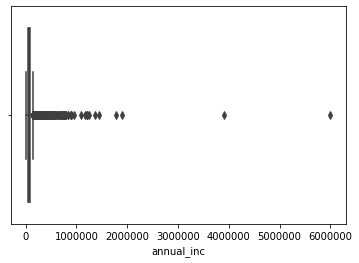

In [40]:
sns.boxplot(data_v3['annual_inc'])

<b> We see presence of outliers in "annual_inc"</b>

In [41]:
data_v3.annual_inc.quantile([0.5, 0.75,0.90, 0.95, 0.97,0.98, 0.99])

0.50     59000.0
0.75     82000.0
0.90    115000.0
0.95    140004.0
0.97    165000.0
0.98    186000.0
0.99    234000.0
Name: annual_inc, dtype: float64

- There is huge increase in the value for small quantile variation i.e from 90th to 95th percentile
- Values after 95 percentile seems to be disconected from the general distribution
- Therefore, we are considering 95th percentile as the threshold for removing outliers

## Removing of Outliers

In [42]:
data_v4 = data_v3[data_v3.annual_inc <= data_v3['annual_inc'].quantile(0.95)]

In [43]:
data_v4.shape

(35948, 36)

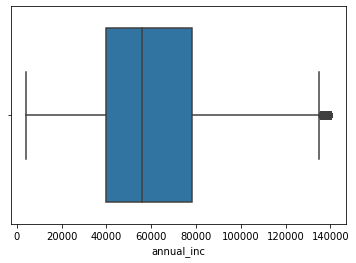

In [44]:
# Checking dirtibution after Outlier treatment
sns.boxplot(data_v4.annual_inc)

# Analysis by Visualisation 

Descriptton : Current status of the loan

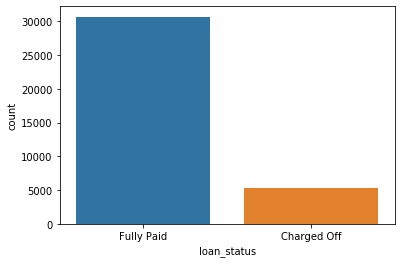

In [45]:
sns.countplot(x = 'loan_status', data = data_v4)

**Conclusion**:<br>
85% of borrowers has paid the loan fully whereas there are 14% who defaulted the loan.

# Univariate Analysis

### 1.  Loan Amount

Description: The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.


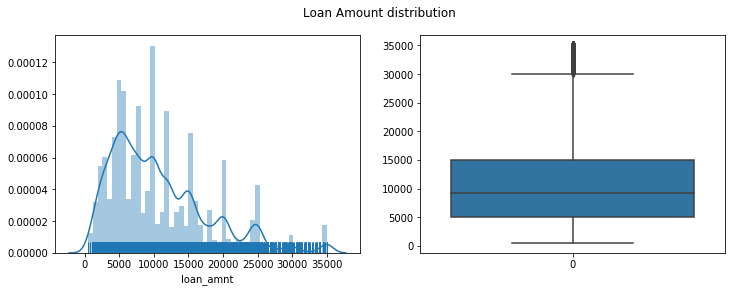

In [46]:
#Increasing the figure size of plot
plt.figure(figsize=(12,4))
#Setting subplot index
plt.subplot(1,2,1)
#Histogram plot
sns.distplot(a=data_v4.loan_amnt, rug=True)
plt.subplot(1,2,2)
#Box plot
sns.boxplot(data=data_v4.loan_amnt)
#Single title for both subplots.
plt.suptitle('Loan Amount distribution')
plt.show()

In [47]:
#Stats of laon amount
data_v4.loan_amnt.describe(percentiles=[0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.99])

count    35948.000000
mean     10706.590770
std       7061.004008
min        500.000000
5%        2300.000000
10%       3000.000000
25%       5000.000000
50%       9250.000000
75%      15000.000000
90%      20000.000000
95%      25000.000000
99%      35000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

**Conclusion**:<br>
We see more number of people took loan of amount 10000, therefore median of distribution is around 10000. Very few people took loan of amount more than 30000.

### 2. funded_amnt

Description : The total amount committed to that loan at that point in time.

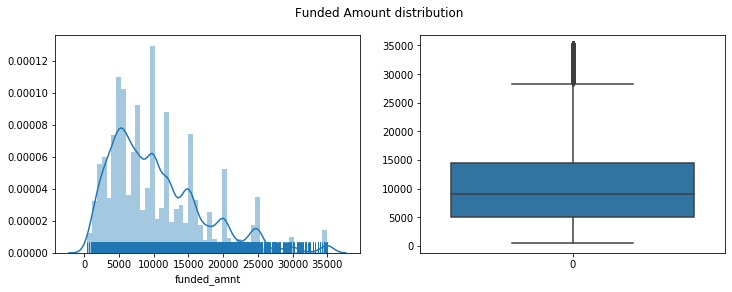

In [48]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(a=data_v4.funded_amnt, rug=True)
plt.subplot(1,2,2)
sns.boxplot(data=data_v4.funded_amnt)
plt.suptitle('Funded Amount distribution')
plt.show()

In [49]:
data_v4.funded_amnt.describe(percentiles=[0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.99])

count    35948.000000
mean     10457.344637
std       6810.106326
min        500.000000
5%        2250.000000
10%       3000.000000
25%       5000.000000
50%       9000.000000
75%      14400.000000
90%      20000.000000
95%      25000.000000
99%      34475.000000
max      35000.000000
Name: funded_amnt, dtype: float64

**Conclusion**:<br>
Funded amount distribution is similar to loan Amount. It tells us that Lending club approved most of Applied loan amount.

### 3. funded_amnt_inv

Description : The total amount committed by investors for that loan at that point in time.

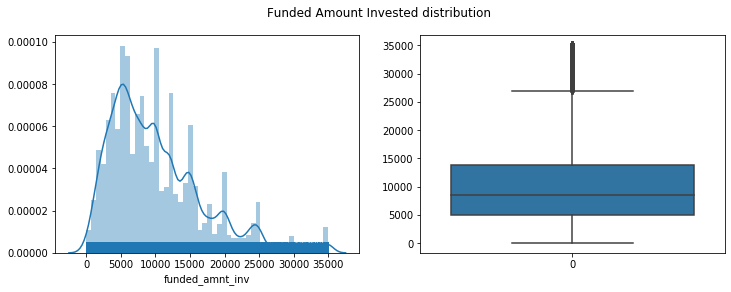

In [50]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(a=data_v4.funded_amnt_inv, rug=True)
plt.subplot(1,2,2)
sns.boxplot(data=data_v4.funded_amnt_inv)
plt.suptitle('Funded Amount Invested distribution')
plt.show()

In [51]:
data_v4.funded_amnt_inv.describe(percentiles=[0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.99])

count    35948.000000
mean     10040.380208
std       6707.705143
min          0.000000
5%        2000.000000
10%       3000.000000
25%       5000.000000
50%       8500.000000
75%      13800.000000
90%      19800.000000
95%      23975.000000
99%      32000.000000
max      35000.000000
Name: funded_amnt_inv, dtype: float64

**Conclusion:**  
Funded amount investment has similar distribution as loan Amount. We can say that Lending club approved atmost of Applied loan amount.

### 4. Approved Loan Amount Ratio

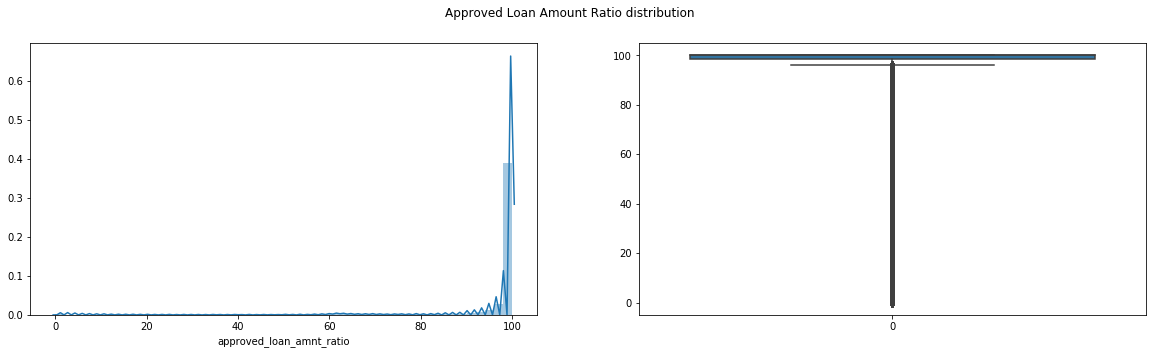

In [52]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.distplot(a=data_v4.approved_loan_amnt_ratio)
plt.subplot(1,2,2)
sns.boxplot(data=data_v4.approved_loan_amnt_ratio)
plt.suptitle('Approved Loan Amount Ratio distribution')
plt.show()

**Conclusion**:
We can see, 70% of Borrowers got 100% loan amount from investors.

### 5. Interest Rate

Description :  Interest Rate on the loan

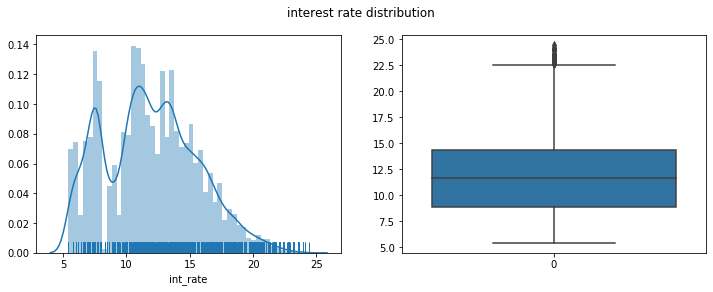

In [53]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(a=data_v4.int_rate, rug=True)
plt.subplot(1,2,2)
sns.boxplot(data=data_v4.int_rate)
plt.suptitle('interest rate distribution')
plt.show()

**Conclusion**:<br>
From the above 2 plots and statistics of interest rates we can conclude that most of the interest rates lies between **8% to 14%**. We can say that few people took loan at higher rates of interest i.e. more than **22.5%**

### 6. Installment

Description : The monthly payment owed by the borrower if the loan originates.

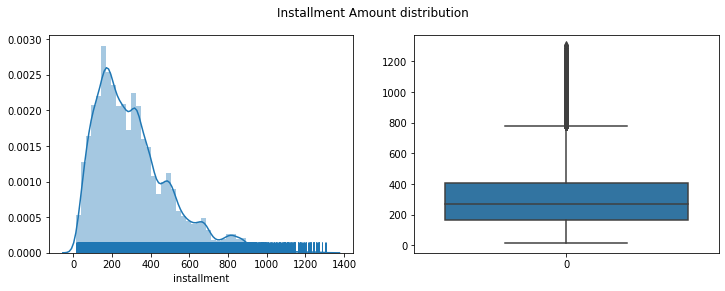

In [54]:
installment = data_v4.installment
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(a=installment, rug=True)
plt.subplot(1,2,2)
sns.boxplot(data=installment)
plt.suptitle('Installment Amount distribution')
plt.show()

**Conclusion**:<br>
The most common value of Installment amount in around 280.

### 7. dti

Description : A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.


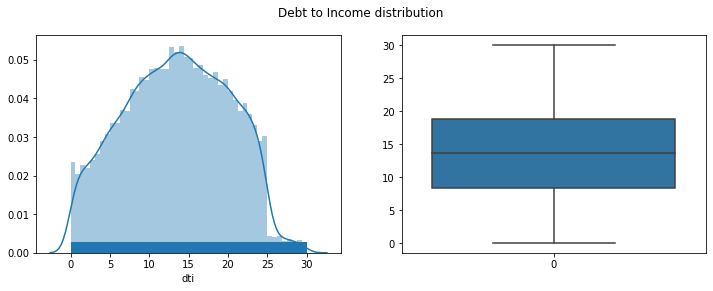

In [55]:
var1 = data_v4.dti

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(a=var1, rug=True)
plt.subplot(1,2,2)
sns.boxplot(data=var1)
plt.suptitle('Debt to Income distribution')
plt.show()

**Conclusion**:<br>
Looks like there are no outliers and the distribution is very much similar to normal distribution.
This is good sign that all the loans are given to barrower's who have Debt to Income ration less than 30.

### 8. Pub rec


Description : Number of derogatory public records

Text(0.5, 1.0, 'pub_rec Distribution')

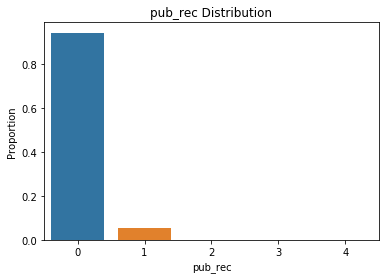

In [56]:
var = 'pub_rec'
#Probability / Percentage of each values
prob_df = data_v4[var].value_counts(normalize=True).reset_index()
sns.barplot(x='index', y=var, data=prob_df)
plt.xlabel(var)
plt.ylabel('Proportion')
plt.title(var+' Distribution')

**Conclusion**<br>
Around 90% borrower's are having no public derogatory records.

### 9.  pub_rec_bankruptcies

Description : Number of public record bankruptcies


Text(0.5, 1.0, 'pub_rec_bankruptcies Distribution')

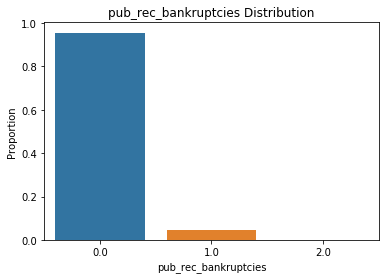

In [57]:
var = 'pub_rec_bankruptcies'
#Probability / Percentage of each values
prob_df = data_v4[var].value_counts(normalize=True).reset_index()
sns.barplot(x='index', y=var, data=prob_df)
plt.xlabel(var)
plt.ylabel('Proportion')
plt.title(var+' Distribution')

**Conclusion**:<br>
99% people have not went bankrupt.

### 10. issue_d

Description : The month which the loan was funded

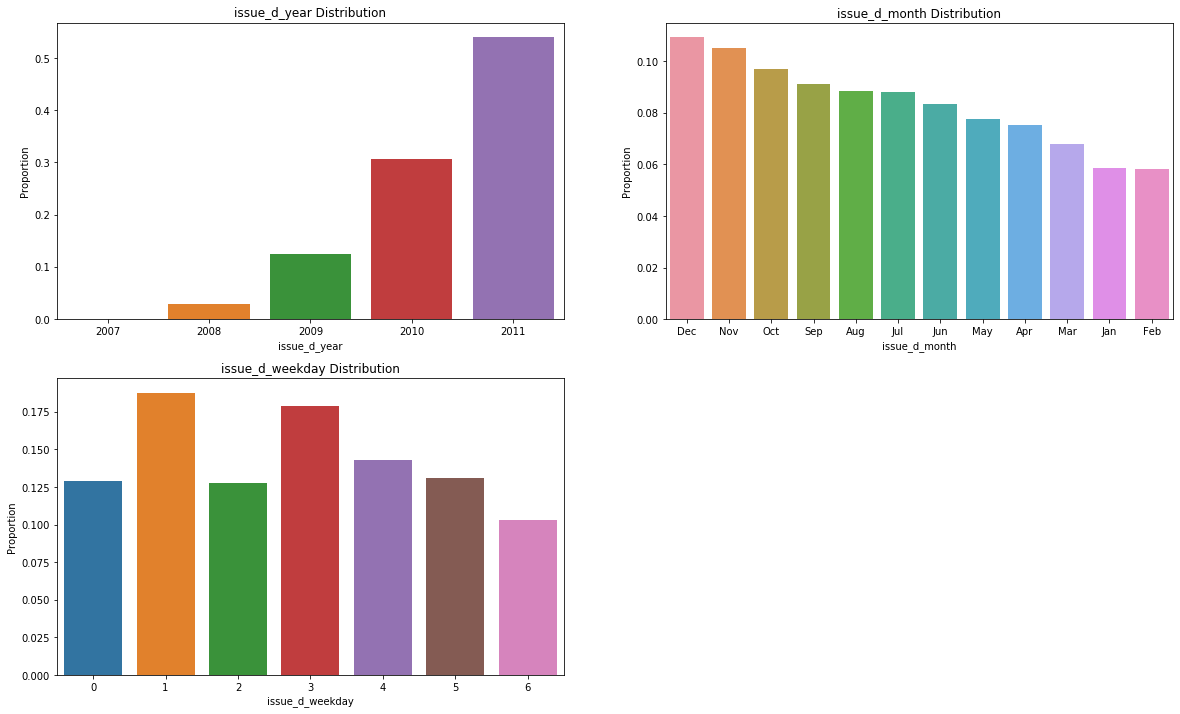

In [58]:
var = 'issue_d_year'
#Probability / Percentage of each values
prob_df = data_v4[var].value_counts(normalize=True).reset_index()

plt.figure(figsize=(20,12))
plt.subplot(2,2,1)
sns.barplot(x='index', y=var, data=prob_df)
plt.xlabel(var)
plt.ylabel('Proportion')
plt.title(var+' Distribution')

var = 'issue_d_month'
#Probability / Percentage of each values
prob_df = data_v4[var].value_counts(normalize=True).reset_index()
plt.subplot(2,2,2)
sns.barplot(x='index', y=var, data=prob_df)
plt.xlabel(var)
plt.ylabel('Proportion')
plt.title(var+' Distribution')


var = 'issue_d_weekday'
#Probability / Percentage of each values
prob_df = data_v4[var].value_counts(normalize=True).reset_index()
plt.subplot(2,2,3)
sns.barplot(x='index', y=var, data=prob_df)
plt.xlabel(var)
plt.ylabel('Proportion')
plt.title(var+' Distribution')

plt.show()

**Conclusion**:<br>
The lending club(LC) has doubling loan issues every year. <br>
There are more issues of loan in last 3 months every end of the ear i.e., Oct, Nov and Dec. <br>
LC has issued more loans on tuesday and wednessday than other week days.

### 11. earliest_cr_line

Description : The month the borrower's earliest reported credit line was opened


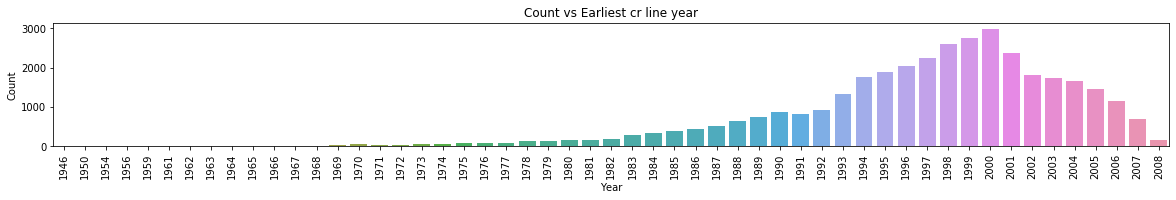

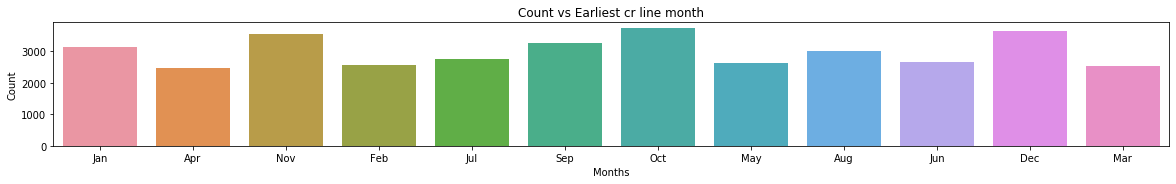

In [59]:
plt.figure(figsize=(20,5))
plt.subplot(2,1,1)
sns.countplot(data_v4.earliest_cr_line_year)
plt.title('Count vs Earliest cr line year')
plt.xticks(rotation=90)
plt.xlabel('Year')
plt.ylabel('Count')
plt.figure(figsize=(20,5))
plt.subplot(2,1,2)
sns.countplot(data_v4.earliest_cr_line_month)
plt.title('Count vs Earliest cr line month')
plt.xlabel('Months')
plt.ylabel('Count')
plt.show()

**Conclusion**:  
Many of Loan borrowers of LC have got earlier credit line in 2000 year, and also most have got earlier credit line on end of the year i.e., Oct, Nov, Dec

### 12. Term

Description : The number of payments on the loan. Values are in months and can be either 36 or 60.


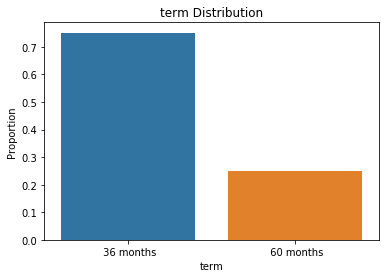

In [60]:
var = 'term'
#Probability / Percentage of each values
prob_df = data_v4[var].value_counts(normalize=True).reset_index()

sns.barplot(x='index', y=var, data=prob_df)
plt.xlabel(var)
plt.ylabel('Proportion')
plt.title(var+' Distribution')
plt.show()

**Conclusion**:<br>
Barrowrs have taken 36 months tenure more than 60 months.


### 13. Grade

Desription : LC assigned loan grade


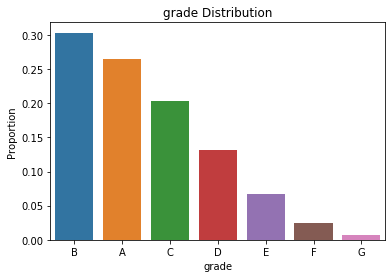

In [61]:
var = 'grade'
#Probability / Percentage of each values
prob_df = data_v4[var].value_counts(normalize=True).reset_index()

sns.barplot(x='index', y=var, data=prob_df)
plt.xlabel(var)
plt.ylabel('Proportion')
plt.title(var+' Distribution')
plt.show()

**Conclusion**: <br>
Most borrowers fall under B and then A grades then other grades

### 14.  Sub Grade

Description : LC assigned loan subgrade


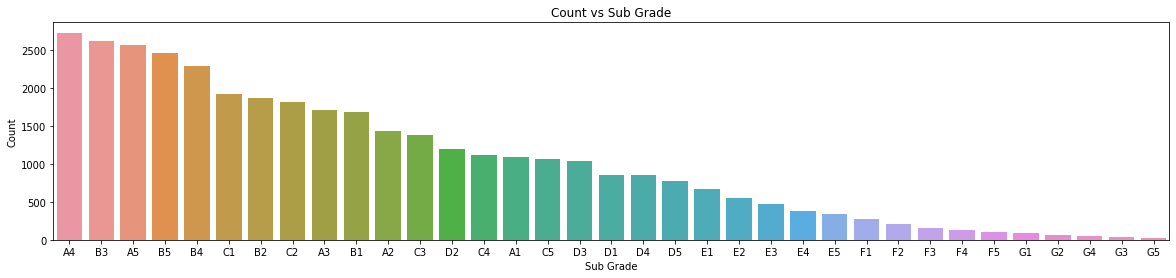

In [62]:
plt.figure(figsize=(20,4))
sns.countplot(data_v4.sub_grade, order=data_v4.sub_grade.value_counts().index)
plt.title('Count vs Sub Grade')
plt.xlabel('Sub Grade')
plt.ylabel('Count')
plt.show()

### 15. Employment length

Description : Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 


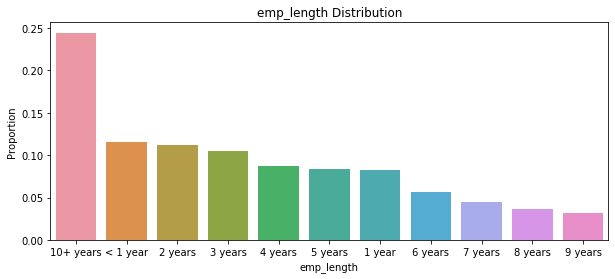

In [63]:
plt.figure(figsize=(10,4))
var = 'emp_length'
#Probability / Percentage of each values
prob_df = data_v4[var].value_counts(normalize=True).reset_index()

sns.barplot(x='index', y=var, data=prob_df)
plt.xlabel(var)
plt.ylabel('Proportion')
plt.title(var+' Distribution')
plt.show()

**Conclusion**:<br>
Most of the borrowers are having 10+ years employment length.

### 16. Home Ownership

Description : The home ownership status provided by the borrower during registration. Our values are: RENT, OWN, MORTGAGE, OTHER.m

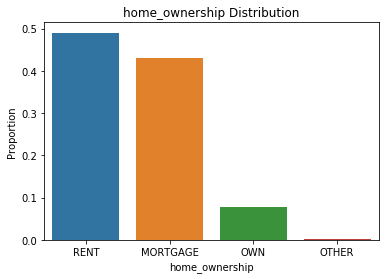

In [64]:
var = 'home_ownership'
#Probability / Percentage of each values
prob_df = data_v4[var].value_counts(normalize=True).reset_index()
#Plotting percentage proporation vs home ownership
sns.barplot(x='index', y=var, data=prob_df)
plt.xlabel(var)
plt.ylabel('Proportion')
plt.title(var+' Distribution')
plt.show()

**Conclusion**:<br>
The loan borrowers are mostly having rented and mortgage houses.

### 17. Verification Status

Description : Indicates if income was verified by LC, not verified, or if the income source was verified


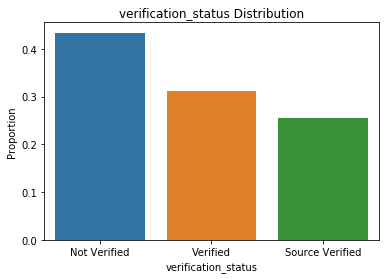

In [65]:
var = 'verification_status'
#Probability / Percentage of each values
prob_df = data_v4[var].value_counts(normalize=True).reset_index()

sns.barplot(x='index', y=var, data=prob_df)
plt.xlabel(var)
plt.ylabel('Proportion')
plt.title(var+' Distribution')
plt.show()

**Conclusion**:<br>
Majority of loans were given without verification of applicants income.

### 18. Purpose

Description : A category provided by the borrower for the loan request. 


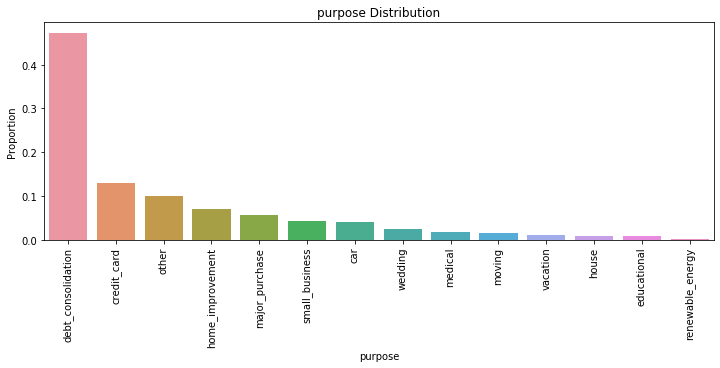

In [66]:
plt.figure(figsize=(12,4))
var = 'purpose'
#Probability / Percentage of each values
prob_df = data_v4[var].value_counts(normalize=True).reset_index()

sns.barplot(x='index', y=var, data=prob_df)
plt.xlabel(var)
plt.xticks(rotation=90)
plt.ylabel('Proportion')
plt.title(var+' Distribution')
plt.show()

**Conclusion**:<br>
We can see maximum number of people took loan for _debt consolidation_ and a very few people took for _renewable energy_

### 19. add_state

Description : The state provided by the borrower in the loan application


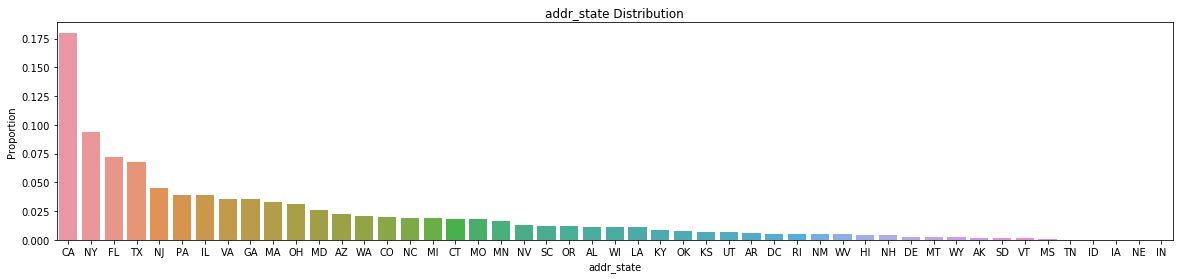

In [67]:
plt.figure(figsize=(20,4))
var = 'addr_state'
#Probability / Percentage of each values
prob_df = data_v4[var].value_counts(normalize=True).reset_index()

sns.barplot(x='index', y=var, data=prob_df)
plt.xlabel(var)
plt.ylabel('Proportion')
plt.title(var+' Distribution')
plt.show()

**Conclusion**:<br>
Most of the borrowers are from _CA_ followed by_NY_

# Segmented Univariate Analysis

## Analysis wrt "Charged-Off" Loans

### 1. Grade

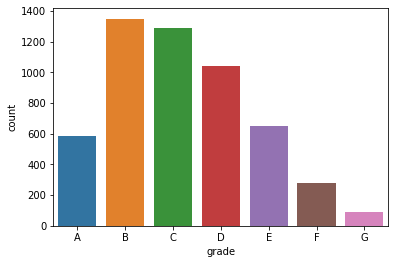

In [68]:
sns.countplot(x = 'grade', data = data_v4[data_v4.loan_status == 'Charged Off'], order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'])

### 2.  Home_ownership

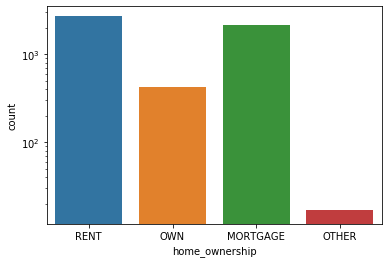

In [69]:
fig, ax = plt.subplots(figsize = (6,4))
ax.set(yscale = 'log')
sns.countplot(x='home_ownership', data=data_v4[data_v4['loan_status']=='Charged Off'])

### 3. purpose

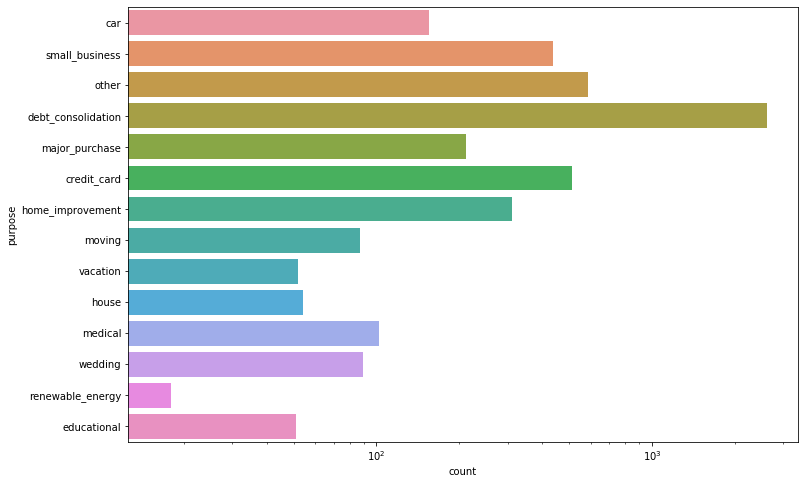

In [70]:
fig, ax = plt.subplots(figsize = (12,8))
ax.set(xscale = 'log')
sns.countplot(y ='purpose', data=data_v4[data_v4.loan_status == 'Charged Off'])


### 4. interest rate wrt the interest rate bins created

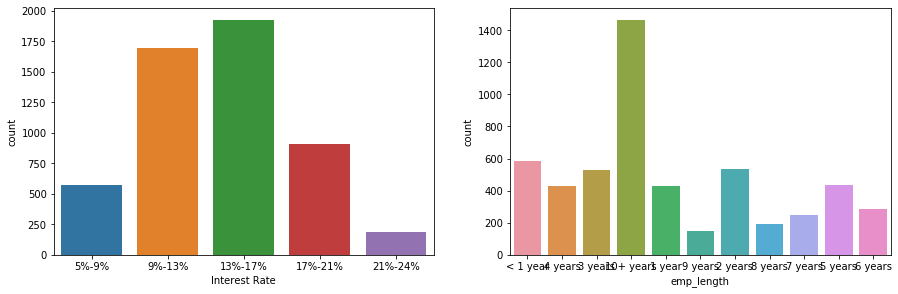

In [71]:
fig, ax = plt.subplots(figsize = (15,10))
plt.subplot(221)
sns.countplot(x='int_rate_groups', data=data_v4[data_v4.loan_status == 'Charged Off'])
plt.xlabel('Interest Rate')
plt.subplot(222)
sns.countplot(x='emp_length', data=data_v4[data_v4.loan_status == 'Charged Off'])

### 5. open_acc_groups

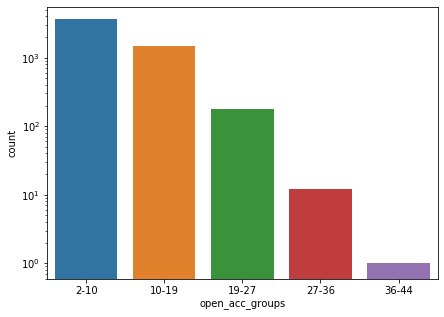

In [72]:
fig, ax = plt.subplots(figsize = (7,5))
ax.set_yscale('log')
sns.countplot(x='open_acc_groups', data=data_v4[data_v4.loan_status == 'Charged Off'])

### 6. revol_util_groups

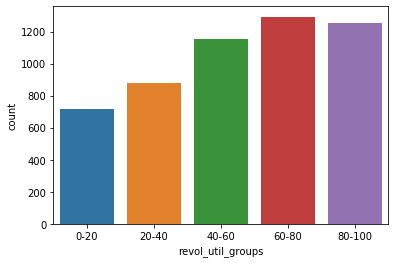

In [73]:
sns.countplot(x='revol_util_groups', data=data_v4[data_v4.loan_status == 'Charged Off'])

### 7. total_acc_groups

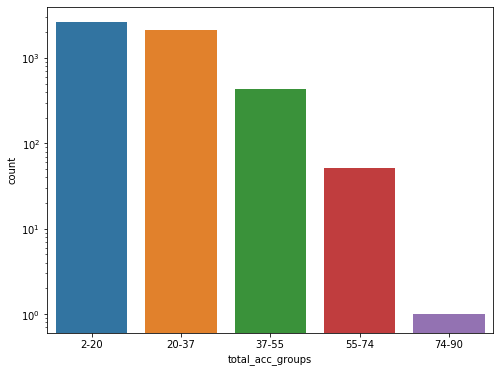

In [74]:
fig, ax = plt.subplots(figsize = (8,6))
ax.set_yscale('log')
sns.countplot(x='total_acc_groups', data=data_v4[data_v4.loan_status == 'Charged Off'])

### 8. annual_inc_groups

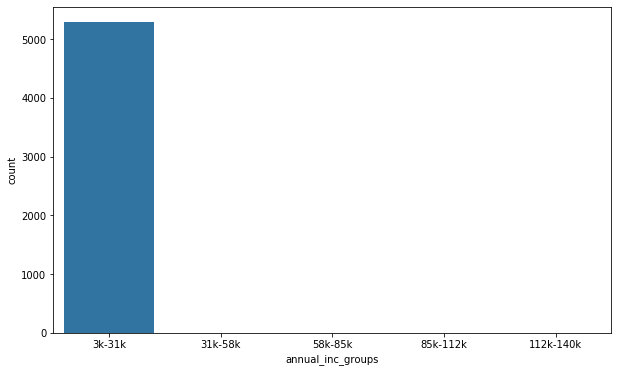

In [75]:
fig, ax = plt.subplots(figsize = (10,6))
sns.countplot(x='annual_inc_groups', data=data_v4[data_v4.loan_status == 'Charged Off'])

### 9. term

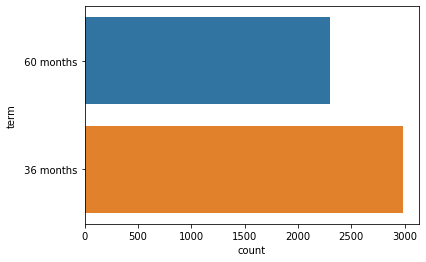

In [76]:
sns.countplot(y='term', data=data_v4[data_v4['loan_status']=='Charged Off'])

### 10.verification_status

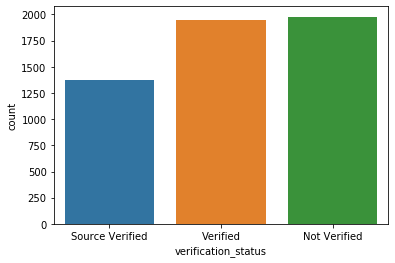

In [77]:
sns.countplot(x='verification_status', data=data_v4[data_v4['loan_status']=='Charged Off'])

### 11. inq_last_6mths

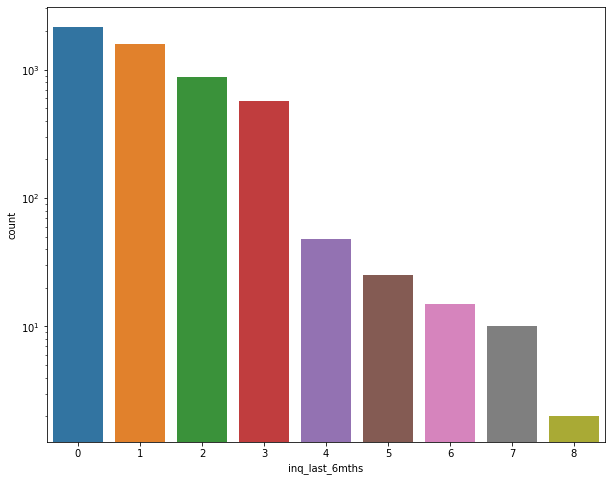

In [78]:
fig,ax = plt.subplots(figsize = (10,8))
ax.set_yscale('log')
sns.countplot(x='inq_last_6mths', data=data_v4[data_v4['loan_status']=='Charged Off'])

### 12. pub_rec

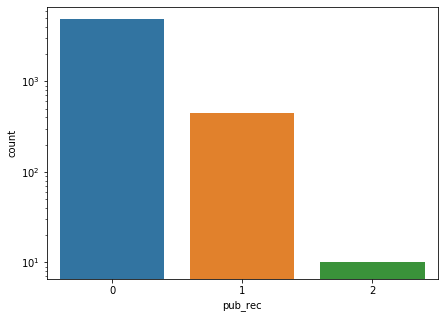

In [79]:
fig,ax = plt.subplots(figsize = (7,5))
ax.set_yscale('log')
sns.countplot(x='pub_rec', data=data_v4[data_v4['loan_status']=='Charged Off'])

### 13. issued month and year


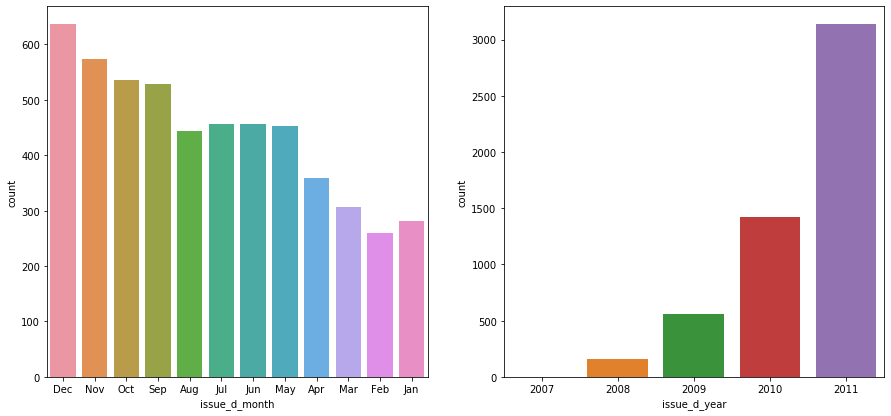

In [80]:
plt.figure(figsize=(15,15))
plt.subplot(221)
sns.countplot(x='issue_d_month', data=data_v4[data_v4['loan_status']=='Charged Off'])
plt.subplot(222)
sns.countplot(x='issue_d_year', data=data_v4[data_v4['loan_status']=='Charged Off'])

#### Conclusion:
#### Maximum number of defaults occured when the loan was issued in December.
#### Loan issued in the year 2011 resulted in defaults as compared to other years.


### 14. funded_amnt_inv groups

In [81]:
data_v4['installment_groups'] = pd.cut(data_v4['installment'], bins=10,precision =0,labels=['14-145','145-274','274-403','403-531','531-660','660-789','789-918','918-1047','1047-1176','1176-1305'])
data_v4['funded_amnt_inv_group'] = pd.cut(data_v4['funded_amnt_inv'], bins=7,labels=['0-5k','5k-10k','10k-15k','15k-20k','20k-25k','25k-30k','30k-35k']) ## bin is starting from -35?
data_v4['loan_amnt_groups'] = pd.cut(data_v4['loan_amnt'], bins=7,precision =0,labels=['0-5k','5k-10k','10k-15k','15k-20k','20k-25k','25k-30k','30k-35k'])
data_v4['dti_groups'] = pd.cut(data_v4['dti'], bins=5,precision =0,labels=['0-6','6-12','12-18','18-24','24-30'])

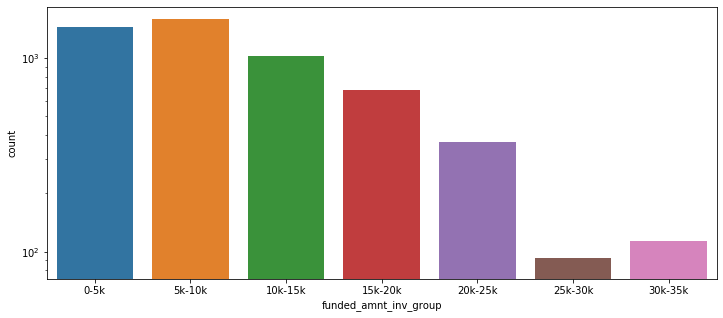

In [82]:
fig,ax = plt.subplots(figsize = (12,5))
ax.set_yscale('log')
sns.countplot(x='funded_amnt_inv_group', data=data_v4[data_v4['loan_status']=='Charged Off'])

### 15. loan_amnt group 

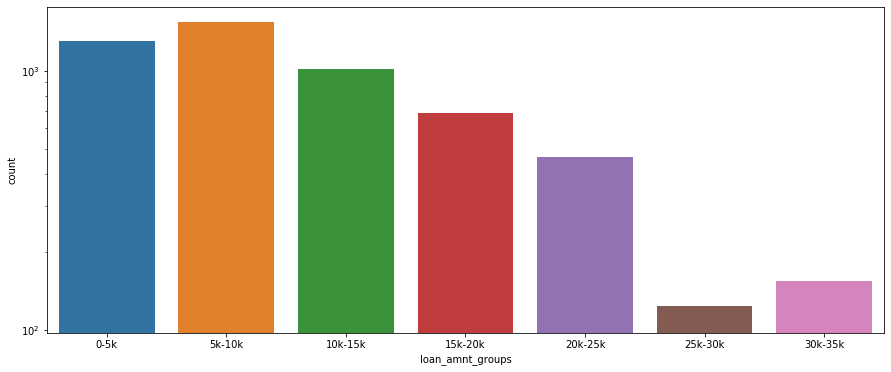

In [83]:
fig,ax = plt.subplots(figsize = (15,6))
ax.set_yscale('log')
sns.countplot(x='loan_amnt_groups', data=data_v4[data_v4['loan_status']=='Charged Off'])

### 16. dti group

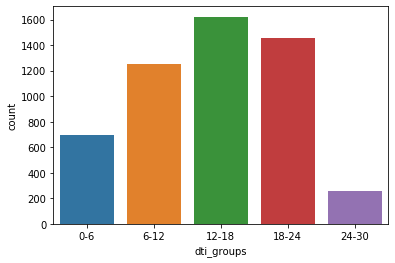

In [84]:
sns.countplot(x='dti_groups', data=data_v4[data_v4['loan_status']=='Charged Off'])

### 17. installment groups

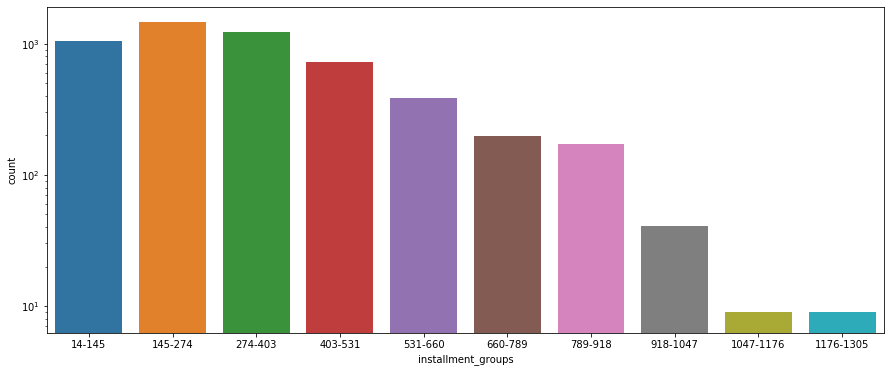

In [85]:
fig,ax = plt.subplots(figsize = (15,6))
ax.set_yscale('log')
sns.countplot(x='installment_groups', data=data_v4[data_v4['loan_status']=='Charged Off'])

# <u> Conclusions wrt "Charged-off" Loans</u>

### The above performed analysis with respect to the "charged off" loans for each variable suggests the following that there is a more probability of a loan defaulting : 

- When the Grade is 'B'
- When total grade of 'B5' level
- If the applicants having house_ownership as 'RENT'
- When the purpose is 'debt_consolidation'
- For applicants who use the loan to clear other debts
- For applicants who receive interest at the rate of 13-17%
- For applicants who have 20-37 open_acc
- For applicants who have an income of range 31201 - 58402
- For applicants with employement length of 10
- When funded amount by investor is between 5000-10000
- When Loan amount is between 5429 - 10357
- When Dti is between 12-18
- When monthly installments are between 145-274
- For Term of 36 months
- When the loan status is Not verified
- When the no of enquiries in last 6 months is 0
- When the number of derogatory public records is 0




### A conclusion derived from date issued is that during end of a year there is a higher possibility of loan defaulting. 
- The high number of loan defaults in 2011 could be due to the financial crisis in USA (Assuming the data is of US origin)

# Bivariate analysis

### 1. Annual income vs loan purpose

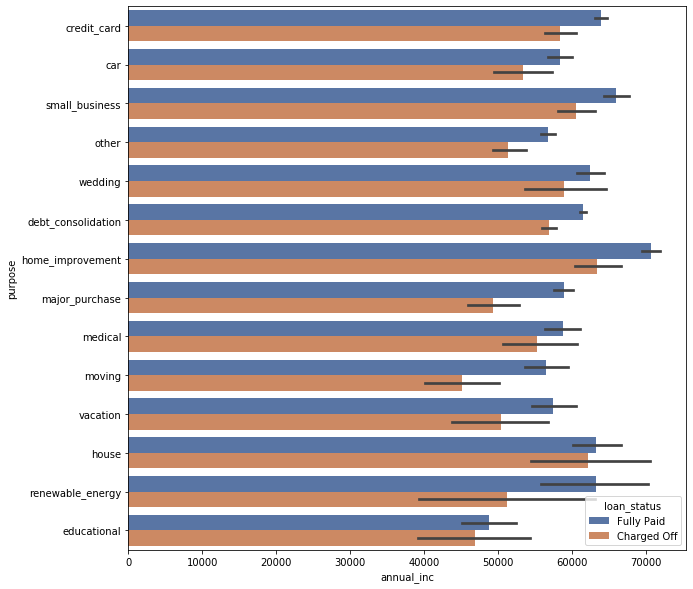

In [86]:
plt.figure(figsize=(10,10))
sns.barplot(data =data_v4,x='annual_inc', y='purpose', hue ='loan_status',palette="deep")
plt.show()

**Conclusion**:<br>
- We can see though that the maximum number of loans applied and defaulted are "debt_consolation" but the annual income of those who applied isn't the highest. 
- Applicants with higher salary mostly applied loans for "home_improvment", "house", "renewable_energy" and "small_businesses"

**Conclusion wrt "charged-off"**:<br>
- With respect to "charged-off" loans, we can say that there is a more probability of defaulting when applicants taking loan for 'home improvement' and have income of 60k -70k.

### 2. Annual income vs home ownership

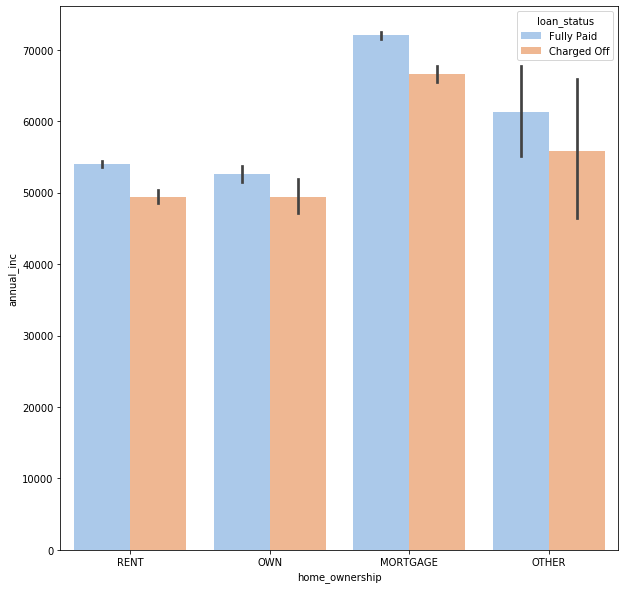

In [87]:
plt.figure(figsize=(10,10))
sns.barplot(data =data_v4,x='home_ownership', y='annual_inc', hue ='loan_status',palette="pastel")
plt.show()

**Conclusion  wrt "charged-off"**:<br>
- With respect to "charged-off" loans, we can say that there is a more probability of defaulting when applicants whose home ownership is 'MORTGAGE and have income of 60-70k.

### 3. Annual Income vs Loan amount

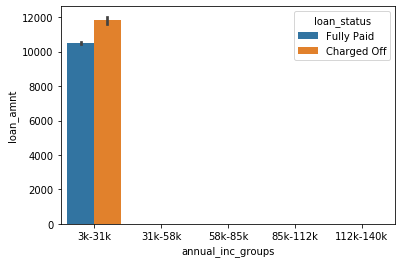

In [88]:
sns.barplot(x = "annual_inc_groups", y = "loan_amnt", hue = 'loan_status', data = data_v4)

**Conclusion**:<br>
- We can see that across all the income groups, the loan_amount is higher for people who defaulted. 

### 4. Annual income vs int_rate

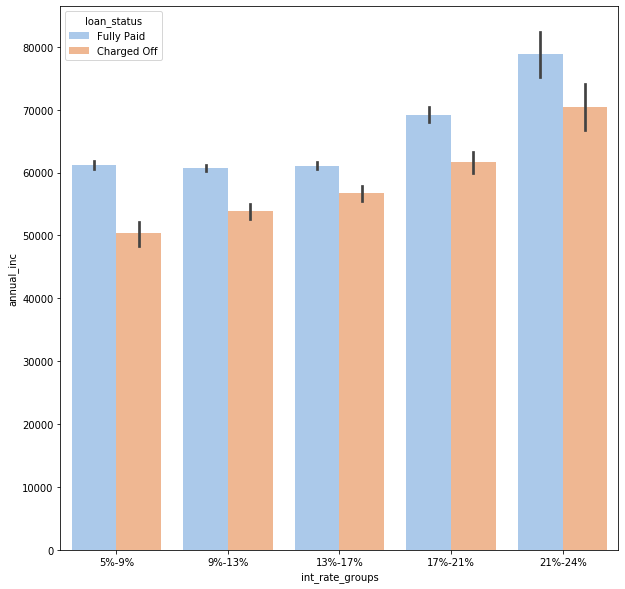

In [89]:
plt.figure(figsize=(10,10))
sns.barplot(data =data_v4,x='int_rate_groups', y='annual_inc', hue ='loan_status',palette="pastel")
plt.show()

**Conclusion  wrt "charged-off"**:<br>
- With respect to "charged-off" loans, we can say that there is a more probability of defaulting when applicants who receive interest at the rate of 21-24% and have an income of 70k-80k.

### 5. Loan Amount vs Interest Rate

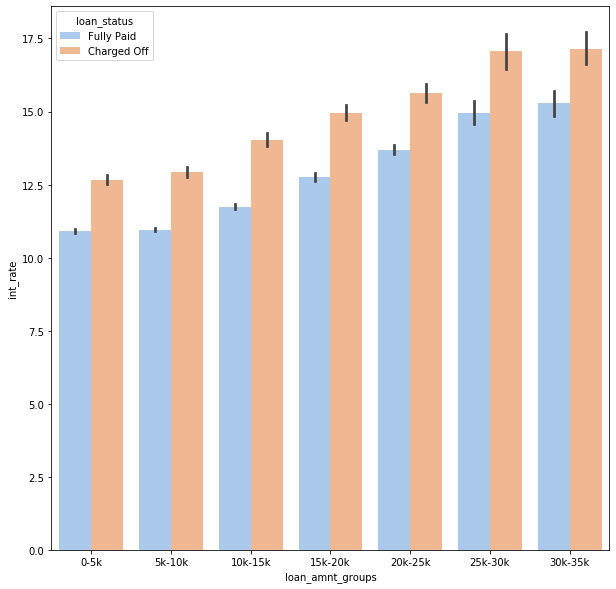

In [90]:
plt.figure(figsize=(10,10))
sns.barplot(data =data_v4,x='loan_amnt_groups', y='int_rate', hue ='loan_status',palette="pastel")
plt.show()

**Conclusion  wrt "charged-off"**:<br>
- With respect to "charged-off" loans, we can say that there is a more probability of defaulting when applicants who have taken a loan in the range 25k - 35k and are charged interest rate of 15-17.5 %.

### 6. Loan vs Loan purpose

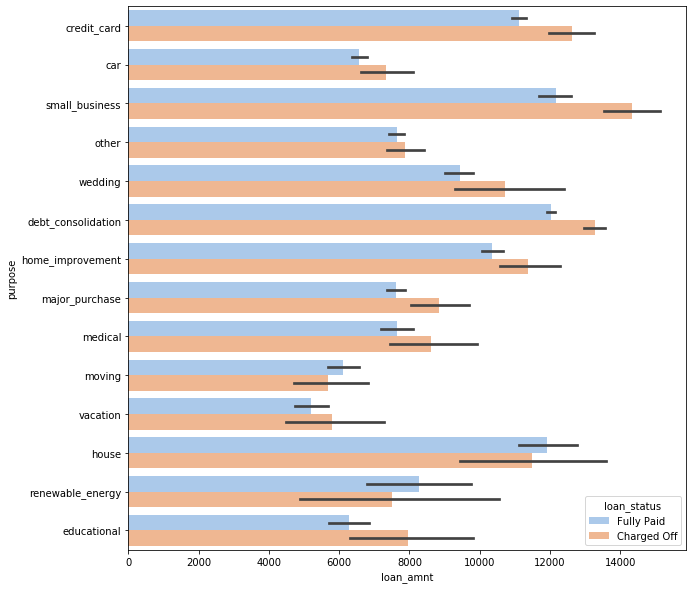

In [91]:
plt.figure(figsize=(10,10))
sns.barplot(data =data_v4,x='loan_amnt', y='purpose', hue ='loan_status',palette="pastel")
plt.show()

**Conclusion  wrt "charged-off"**:<br>
- With respect to "charged-off" loans, we can say that there is a more probability of defaulting when applicants who have taken a loan for small business and the loan amount is close to 14k or above.

### 7. Loan vs House Ownership

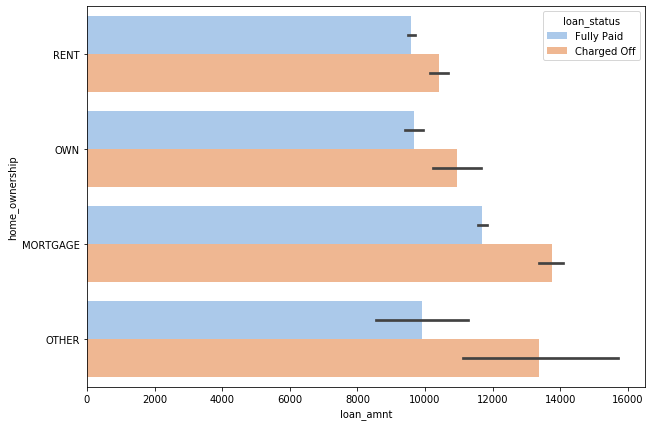

In [92]:
plt.figure(figsize=(10,7))
sns.barplot(data =data_v4,x='loan_amnt', y='home_ownership', hue ='loan_status',palette="pastel")
plt.show()

**Conclusion  wrt "charged-off"**:<br>
- With respect to "charged-off" loans, we can say that there is a more probability of defaulting when applicants whose home ownership is 'MORTGAGE and have loan of 13k+.

### 8. Loan amount vs month issued and year issued

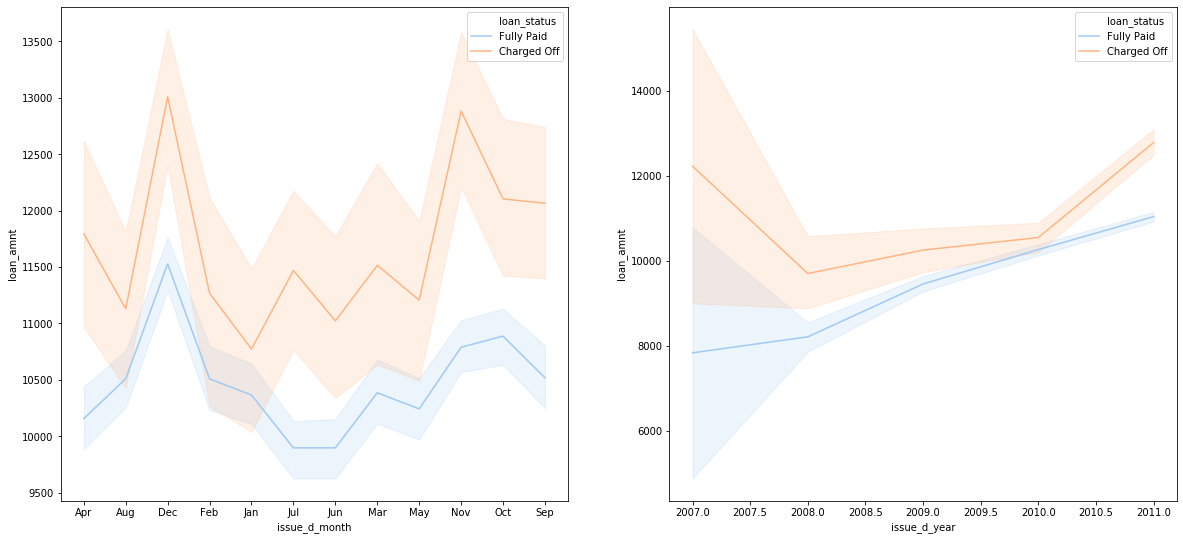

In [93]:
plt.figure(figsize=(20,20))
plt.subplot(221)
sns.lineplot(data =data_v4,y='loan_amnt', x='issue_d_month', hue ='loan_status',palette="pastel")
plt.subplot(222)
sns.lineplot(data =data_v4,y='loan_amnt', x='issue_d_year', hue ='loan_status',palette="pastel")


### 9. Loan amount vs Grade

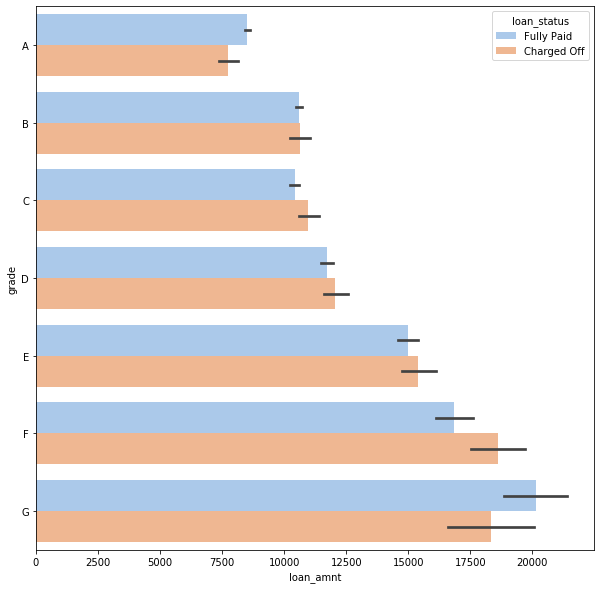

In [94]:
plt.figure(figsize=(10,10))
sns.barplot(data =data_v4,x='loan_amnt', y='grade', hue ='loan_status',palette="pastel", order=['A','B','C','D','E','F','G'])
plt.show()

**Conclusion  wrt "charged-off"**:<br>
- With respect to "charged-off" loans, we can say that there is a more probability of defaulting when the grade is F and loan amount is between 15k-20k.

### 10. Loan amount vs Emp lenght

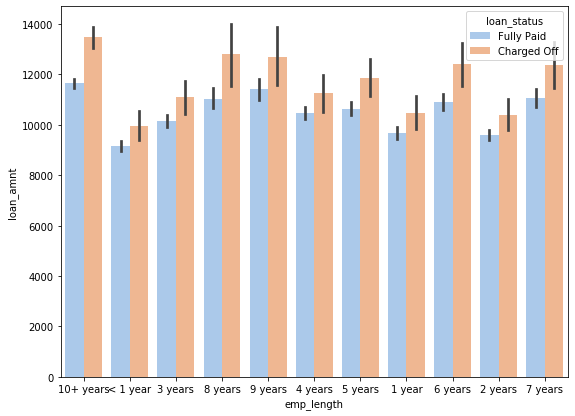

In [95]:
plt.figure(figsize=(20,15))
plt.subplot(221)
sns.barplot(data =data_v4,y='loan_amnt', x='emp_length', hue ='loan_status',palette="pastel")



**Conclusion**:<br>
- We can see that employees with longer working history got the loan approved for a higher amount. 

**Conclusion  wrt "charged-off"**:<br>
- With respect to "charged-off" loans, we can say that there is a more probability of defaulting when the employment length is more than 7yrs and loan amount is 12k-14k.

### 11. Loan amount vs verification status

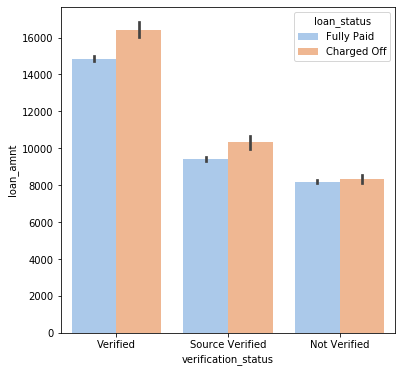

In [96]:
plt.figure(figsize=(6,6))
sns.barplot(data =data_v4,y='loan_amnt', x='verification_status', hue ='loan_status',palette="pastel")


**Conclusion**:<br>
- Looking at the verification status data, we can say verified loan applications tend to have higher loan amount. This might indicate that the loan banks are first verifying the loans with higher values.

**Conclusion  wrt "charged-off"**:<br>
- With respect to "charged-off" loans, we can say that there is a more probability of defaulting when the loan is verified and loan amount is above 15k.

### 12. term vs loan amount

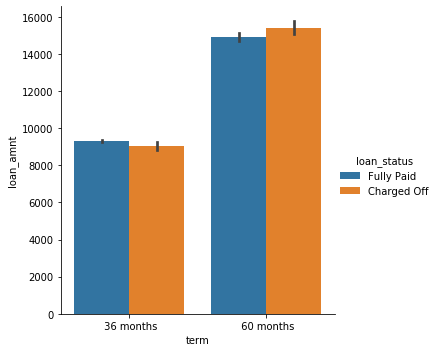

In [97]:
sns.catplot(x = 'term', y = 'loan_amnt', data = data_v4,hue = 'loan_status', kind = 'bar')

**Conclusion**:<br>
- We see that the applicants who paid and defaulted have no significant difference in loan_amounts
- We can only say that applicants applying for long term loans have taken loan for a higher loan amount

### 13. loan amount group vs interest rate

<Figure size 432x288 with 0 Axes>

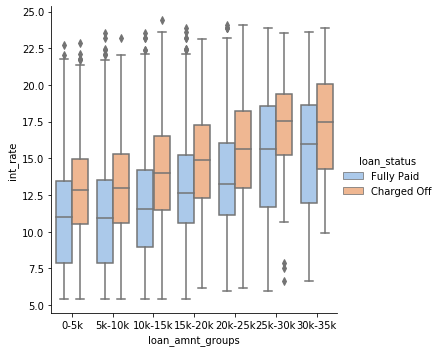

In [98]:
# fig,ax = plt.subplots(figsize = (15,6))
plt.tight_layout()
sns.catplot(data =data_v4,y ='int_rate', x ='loan_amnt_groups', hue ='loan_status',palette="pastel",kind = 'box')

**Conclusion**:<br>
- We see that the interest rate for charged off loans is pretty high than that of fully paid loans in all the loan_amount groups.
- We suspect this could be a pretty strong driving factor for loan defaulting.

### 14. grade vs interest rate

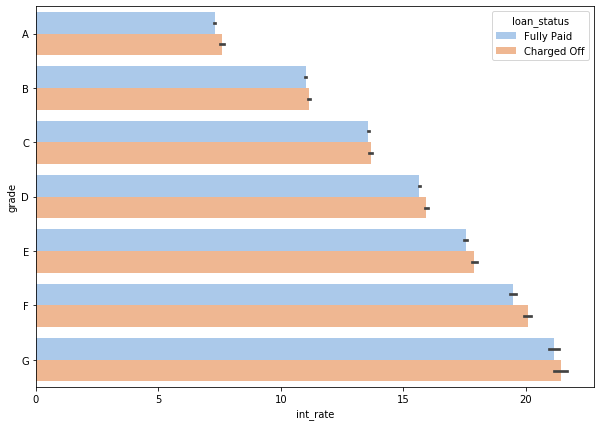

In [99]:
plt.figure(figsize=(10,7))
sns.barplot(data =data_v4,x='int_rate', y='grade', hue ='loan_status',palette="pastel", order=['A','B','C','D','E','F','G'])
plt.show()

**Conclusion  wrt "charged-off"**:<br>
- With respect to "charged-off" loans, we can say that there is a more probability of defaulting for grade G with interest rate above 20%.